In [1]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import shapiro, kstest, normaltest,skew

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Problem statement

## Data Gathering

In [2]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## 3. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df = df.drop('Car_Name', axis = 1)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df = df.drop('Owner', axis = 1)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual


In [6]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual


In [7]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [8]:
df = pd.get_dummies(df,columns = ['Fuel_Type'], dtype=int)

In [9]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,3.35,5.59,27000,Dealer,Manual,0,0,1
1,2013,4.75,9.54,43000,Dealer,Manual,0,1,0
2,2017,7.25,9.85,6900,Dealer,Manual,0,0,1
3,2011,2.85,4.15,5200,Dealer,Manual,0,0,1
4,2014,4.60,6.87,42450,Dealer,Manual,0,1,0
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Dealer,Manual,0,1,0
297,2015,4.00,5.90,60000,Dealer,Manual,0,0,1
298,2009,3.35,11.00,87934,Dealer,Manual,0,0,1
299,2017,11.50,12.50,9000,Dealer,Manual,0,1,0


In [10]:
df['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [11]:
df['Seller_Type'].replace({'Dealer':1, 'Individual':0}, inplace = True)

In [12]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [13]:
df['Transmission'].replace({'Manual':1, 'Automatic':0}, inplace = True)

In [14]:
df = pd.get_dummies(df, dtype = int )
df

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,3.35,5.59,27000,1,1,0,0,1
1,2013,4.75,9.54,43000,1,1,0,1,0
2,2017,7.25,9.85,6900,1,1,0,0,1
3,2011,2.85,4.15,5200,1,1,0,0,1
4,2014,4.60,6.87,42450,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,1,0,1,0
297,2015,4.00,5.90,60000,1,1,0,0,1
298,2009,3.35,11.00,87934,1,1,0,0,1
299,2017,11.50,12.50,9000,1,1,0,1,0


In [15]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,3.35,5.59,27000,1,1,0,0,1
1,2013,4.75,9.54,43000,1,1,0,1,0
2,2017,7.25,9.85,6900,1,1,0,0,1
3,2011,2.85,4.15,5200,1,1,0,0,1
4,2014,4.60,6.87,42450,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,1,0,1,0
297,2015,4.00,5.90,60000,1,1,0,0,1
298,2009,3.35,11.00,87934,1,1,0,0,1
299,2017,11.50,12.50,9000,1,1,0,1,0


## Detect Outlier

<Axes: ylabel='Selling_Price'>

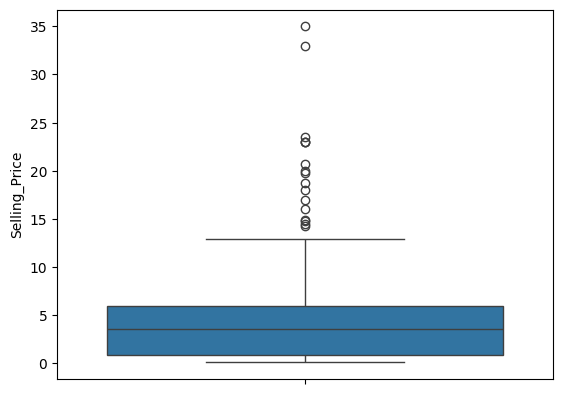

In [16]:
sns.boxplot(df['Selling_Price'])

### handling outliers in Selling_Price

In [17]:
q1 = df['Selling_Price'].quantile(0.25)
q2 = df['Selling_Price'].quantile(0.5)
q3 = df['Selling_Price'].quantile(0.75)
print(q1)
print(q2)
print(q3)

IQR = q3 - q1
print("IQR :",IQR)

print('Minimum Value :',df['Selling_Price'].min())

lower_tail = q1 - 1.5 * IQR
print("Lower Tail :", lower_tail)

upper_tail = q3 + 1.5 * IQR
print("Upper Tail :", upper_tail)

0.9
3.6
6.0
IQR : 5.1
Minimum Value : 0.1
Lower Tail : -6.749999999999999
Upper Tail : 13.649999999999999


In [18]:
Selling_Price_index = df.loc[(df['Selling_Price']) > upper_tail].index
#index_list = iris_df.loc[(iris_df['SepalLengthCm'] < 5.5) ].index

In [19]:
Selling_Price_index

Index([50, 51, 52, 53, 59, 62, 63, 64, 66, 69, 79, 80, 82, 86, 93, 96, 97], dtype='int64')

In [20]:
df['Selling_Price'].iloc[Selling_Price_index] = upper_tail
df

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,3.35,5.59,27000,1,1,0,0,1
1,2013,4.75,9.54,43000,1,1,0,1,0
2,2017,7.25,9.85,6900,1,1,0,0,1
3,2011,2.85,4.15,5200,1,1,0,0,1
4,2014,4.60,6.87,42450,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,1,0,1,0
297,2015,4.00,5.90,60000,1,1,0,0,1
298,2009,3.35,11.00,87934,1,1,0,0,1
299,2017,11.50,12.50,9000,1,1,0,1,0


<Axes: ylabel='Selling_Price'>

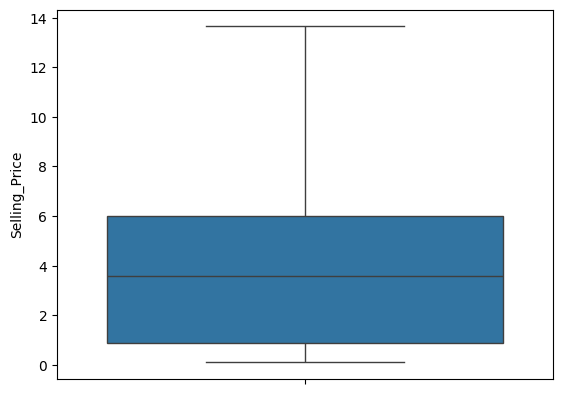

In [21]:
sns.boxplot(df['Selling_Price'])

<Axes: ylabel='Present_Price'>

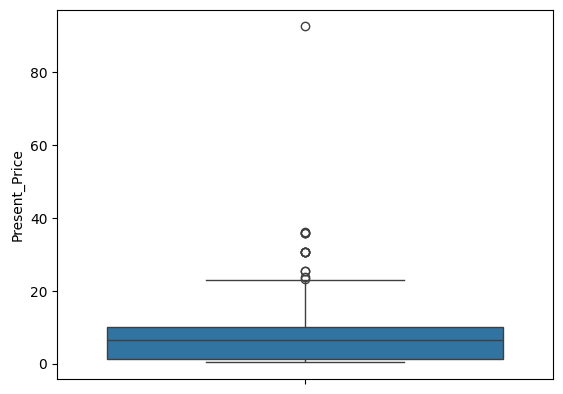

In [22]:
sns.boxplot(df['Present_Price'])

### handling outliers in Present_Price

In [23]:
q1 = df['Present_Price'].quantile(0.25)
q2 = df['Present_Price'].quantile(0.5)
q3 = df['Present_Price'].quantile(0.75)
print(q1)
print(q2)
print(q3)

IQR = q3 - q1
print("IQR :",IQR)

print('Minimum Value :',df['Present_Price'].min())

lower_tail = q1 - 1.5 * IQR
print("Lower Tail :", lower_tail)

upper_tail = q3 + 1.5 * IQR
print("Upper Tail :", upper_tail)

1.2
6.4
9.9
IQR : 8.700000000000001
Minimum Value : 0.32
Lower Tail : -11.850000000000001
Upper Tail : 22.950000000000003


In [24]:
Present_Price_index = df.loc[(df['Present_Price']) > upper_tail].index

In [25]:
df['Present_Price'].iloc[Present_Price_index] = upper_tail

In [26]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,3.35,5.59,27000,1,1,0,0,1
1,2013,4.75,9.54,43000,1,1,0,1,0
2,2017,7.25,9.85,6900,1,1,0,0,1
3,2011,2.85,4.15,5200,1,1,0,0,1
4,2014,4.60,6.87,42450,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,1,0,1,0
297,2015,4.00,5.90,60000,1,1,0,0,1
298,2009,3.35,11.00,87934,1,1,0,0,1
299,2017,11.50,12.50,9000,1,1,0,1,0


<Axes: ylabel='Present_Price'>

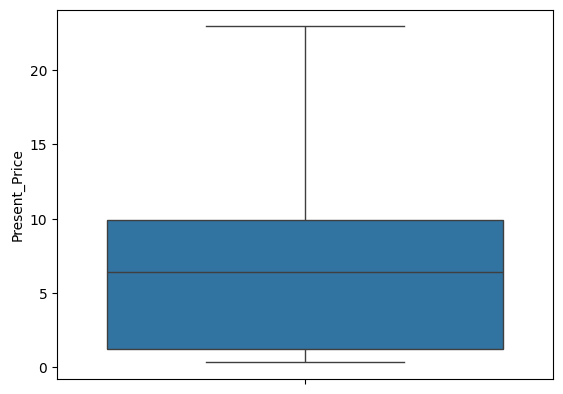

In [27]:
sns.boxplot(df['Present_Price'])

<Axes: ylabel='Kms_Driven'>

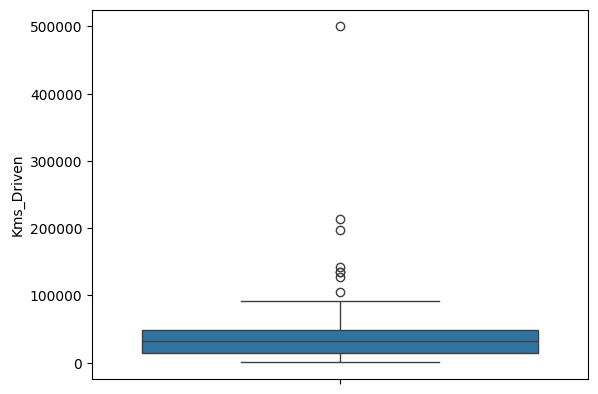

In [28]:
sns.boxplot(df['Kms_Driven'])

### handling outliers in Kms_Driven

In [29]:
q1 = df['Kms_Driven'].quantile(0.25)
q2 = df['Kms_Driven'].quantile(0.5)
q3 = df['Kms_Driven'].quantile(0.75)
print(q1)
print(q2)
print(q3)

IQR = q3 - q1
print("IQR :",IQR)

print('Minimum Value :',df['Kms_Driven'].min())

lower_tail = q1 - 1.5 * IQR
print("Lower Tail :", lower_tail)

upper_tail = q3 + 1.5 * IQR
print("Upper Tail :", upper_tail)

15000.0
32000.0
48767.0
IQR : 33767.0
Minimum Value : 500
Lower Tail : -35650.5
Upper Tail : 99417.5


In [30]:
Kms_Driven_index = df.loc[(df['Kms_Driven']) > upper_tail].index

In [31]:
Kms_Driven_index

Index([37, 50, 53, 77, 84, 85, 179, 196], dtype='int64')

In [32]:
df['Kms_Driven'].iloc[Kms_Driven_index] = upper_tail

<Axes: ylabel='Kms_Driven'>

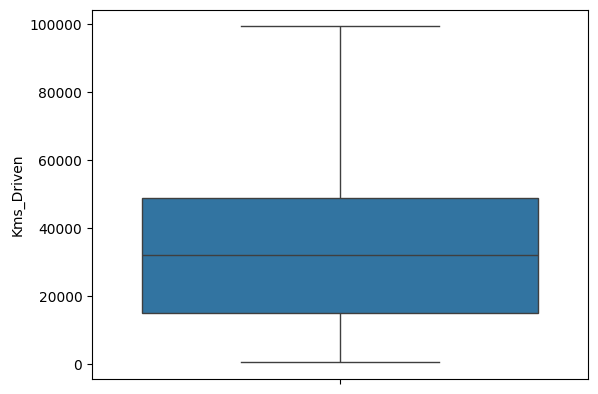

In [33]:
sns.boxplot(df['Kms_Driven'])

<Axes: ylabel='Seller_Type'>

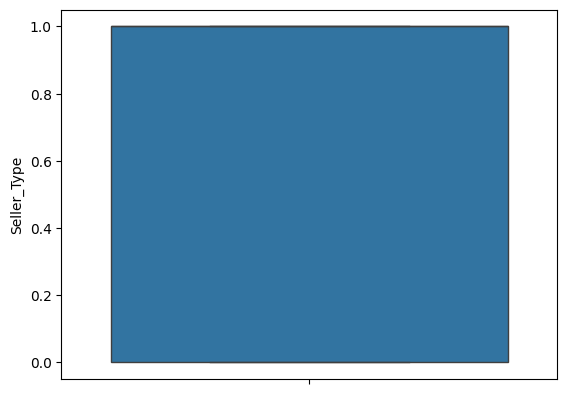

In [34]:
sns.boxplot(df['Seller_Type'])

<Axes: ylabel='Transmission'>

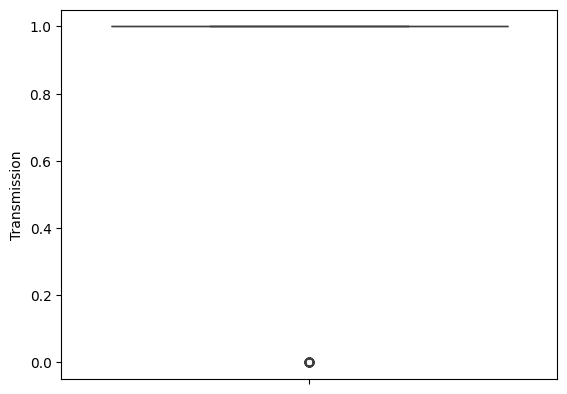

In [35]:
sns.boxplot(df['Transmission'])

In [36]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,3.35,5.59,27000.0,1,1,0,0,1
1,2013,4.75,9.54,43000.0,1,1,0,1,0
2,2017,7.25,9.85,6900.0,1,1,0,0,1
3,2011,2.85,4.15,5200.0,1,1,0,0,1
4,2014,4.60,6.87,42450.0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988.0,1,1,0,1,0
297,2015,4.00,5.90,60000.0,1,1,0,0,1
298,2009,3.35,11.00,87934.0,1,1,0,0,1
299,2017,11.50,12.50,9000.0,1,1,0,1,0


## Feature Engineering

## Model Training

In [37]:
x = df.drop('Selling_Price', axis = 1)
y = df.Selling_Price

In [38]:
x

,Year,Present_Price,Kms_Driven,Seller_Type,Transmission,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,5.59,27000.0,1,1,0,0,1
1,2013,9.54,43000.0,1,1,0,1,0
2,2017,9.85,6900.0,1,1,0,0,1
3,2011,4.15,5200.0,1,1,0,0,1
4,2014,6.87,42450.0,1,1,0,1,0
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988.0,1,1,0,1,0
297,2015,5.90,60000.0,1,1,0,0,1
298,2009,11.00,87934.0,1,1,0,0,1
299,2017,12.50,9000.0,1,1,0,1,0


In [39]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [40]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Year,1.000000,0.281617,-0.033008,-0.640598,0.039896,0.000394,-0.017790,0.064315,-0.059959
Selling_Price,0.281617,1.000000,0.871568,0.127841,0.674330,-0.301243,-0.025615,0.562846,-0.550860
Present_Price,-0.033008,0.871568,1.000000,0.386580,0.661626,-0.370795,-0.008795,0.485445,-0.477778
Kms_Driven,-0.640598,0.127841,0.386580,1.000000,0.269800,-0.093247,0.028735,0.287172,-0.289454
Seller_Type,0.039896,0.674330,0.661626,0.269800,1.000000,-0.063240,0.060300,0.350467,-0.358321
Transmission,0.000394,-0.301243,-0.370795,-0.093247,-0.063240,1.000000,0.032018,-0.098643,0.091013
Fuel_Type_CNG,-0.017790,-0.025615,-0.008795,0.028735,0.060300,0.032018,1.000000,-0.040808,-0.160577
Fuel_Type_Diesel,0.064315,0.562846,0.485445,0.287172,0.350467,-0.098643,-0.040808,1.000000,-0.979648
Fuel_Type_Petrol,-0.059959,-0.550860,-0.477778,-0.289454,-0.358321,0.091013,-0.160577,-0.979648,1.000000


In [41]:
for idx in range(x.shape[1]):
    vif = variance_inflation_factor(x,idx)
    print("VIF :",vif)

VIF : 2.0162150929068776
VIF : 2.6949577234357176
VIF : 2.372488139297481
VIF : 1.9535163246387313
VIF : 1.258110592578375
VIF : 6535.702165647829
VIF : 196283.4263637785
VIF : 780724.5479194738


## Train Test Split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

## Model Training

In [43]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)
lin_reg_model

LinearRegression()

In [44]:
np.around(lin_reg_model.coef_,3)

array([ 0.295,  0.435, -0.   ,  1.238, -0.115, -0.976,  1.319, -0.343])

In [45]:
lin_reg_model.intercept_

-592.8330355151992

## Model Evaluation

### Training Data Evaluation

In [46]:
y_pred_train = lin_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

r_squared = r2_score(y_train, y_pred_train)
print("R-Squared :",r_squared)

MSE : 1.4958137246041514
RMSE: 1.2230346375324581
R-Squared : 0.8911201362969946


### Testing Data Evaluation

In [47]:
y_pred_test = lin_reg_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

r_squared = r2_score(y_test, y_pred_test)
print("R-Squared :",r_squared)

MSE : 1.8597967032948775
RMSE: 1.3637436354736463
R-Squared : 0.8767323359946549


### Normality

In [48]:
residual = y_train - y_pred_train
residual

235    2.428149
106   -0.589929
10    -1.507755
152    0.163649
77    -1.388969
         ...   
75    -0.668202
22     0.544006
72    -1.393879
15    -0.448801
168   -0.114211
Name: Selling_Price, Length: 240, dtype: float64

In [49]:
import matplotlib.pyplot as plt

<Axes: xlabel='Selling_Price', ylabel='Density'>

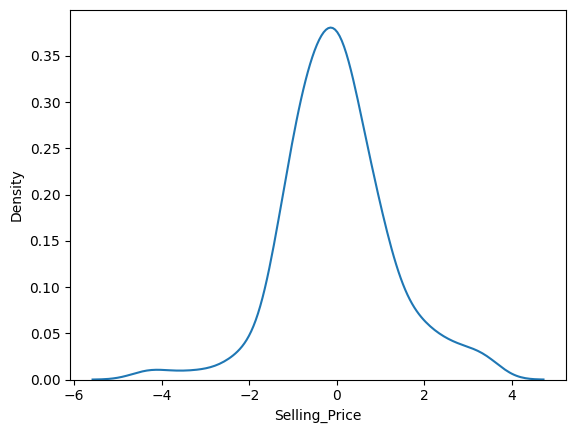

In [50]:
sns.kdeplot(residual)

In [51]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,3.35,5.59,27000.0,1,1,0,0,1
1,2013,4.75,9.54,43000.0,1,1,0,1,0
2,2017,7.25,9.85,6900.0,1,1,0,0,1
3,2011,2.85,4.15,5200.0,1,1,0,0,1
4,2014,4.60,6.87,42450.0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988.0,1,1,0,1,0
297,2015,4.00,5.90,60000.0,1,1,0,0,1
298,2009,3.35,11.00,87934.0,1,1,0,0,1
299,2017,11.50,12.50,9000.0,1,1,0,1,0


### Pickle file

In [52]:
import pickle

In [53]:
with open("lin_reg_model.pkl", 'wb') as f:
    pickle.dump(lin_reg_model,f)

In [54]:
column_data = {
                "Seller_Type": {'Dealer':1, 'Individual':0},
                "Transmission" : {'Manual':1, 'Automatic':0}
                }
with open("column_data.json", 'w') as f:
    json.dump(column_data,f)

### Load model

In [55]:
with open("lin_reg_model.pkl", 'rb') as f:
    model = pickle.load(f)